In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df=pd.read_csv("cars_24_combined_cleaned.csv")
print(df)

              Car Name    Year  Distance  Owner    Fuel Location      Drive  \
0         BMW 3 Series  2013.0    153870      3  DIESEL    CH-01  Automatic   
1            Datsun Go  2014.0     18499      1  PETROL    MH-01     Manual   
2            Datsun Go  2014.0     62884      1  PETROL    WB-24     Manual   
3            Datsun Go  2014.0     66599      1  PETROL    KL-01     Manual   
4            Datsun Go  2016.0     42285      1  PETROL    BR-01     Manual   
...                ...     ...       ...    ...     ...      ...        ...   
8010  Volkswagen Vento  2021.0     28085      1  PETROL    GJ-05  Automatic   
8011  Volkswagen Vento  2021.0     37535      1  PETROL    MH-02  Automatic   
8012  Volkswagen Vento  2021.0     91750      2  PETROL    MH-43     Manual   
8013  Volkswagen Vento  2022.0     42247      1  PETROL    KA-05     Manual   
8014           Audi X3  2023.0     13794      1  PETROL    DL-14  Automatic   

           Type    Price  
0     Lux_sedan  1005000

## Describeness



In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car Name  8015 non-null   object 
 1   Year      8015 non-null   float64
 2   Distance  8015 non-null   int64  
 3   Owner     8015 non-null   int64  
 4   Fuel      8015 non-null   object 
 5   Location  8015 non-null   object 
 6   Drive     8015 non-null   object 
 7   Type      8015 non-null   object 
 8   Price     8015 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 563.7+ KB
None


In [32]:
print(df.describe())

              Year       Distance        Owner         Price
count  8015.000000    8015.000000  8015.000000  8.015000e+03
mean   2016.995758   52621.411728     1.300187  5.748829e+05
std       2.862062   29182.922728     0.510893  2.651049e+05
min    2010.000000       0.000000     1.000000  1.190000e+05
25%    2015.000000   30730.000000     1.000000  3.930000e+05
50%    2017.000000   50359.000000     1.000000  5.350000e+05
75%    2019.000000   71762.000000     2.000000  6.980000e+05
max    2023.000000  971212.000000     4.000000  3.300000e+06


In [33]:
print(df.head(10))

       Car Name    Year  Distance  Owner    Fuel Location      Drive  \
0  BMW 3 Series  2013.0    153870      3  DIESEL    CH-01  Automatic   
1     Datsun Go  2014.0     18499      1  PETROL    MH-01     Manual   
2     Datsun Go  2014.0     62884      1  PETROL    WB-24     Manual   
3     Datsun Go  2014.0     66599      1  PETROL    KL-01     Manual   
4     Datsun Go  2016.0     42285      1  PETROL    BR-01     Manual   
5     Datsun Go  2016.0     47323      1  PETROL    KL-45     Manual   
6     Datsun Go  2016.0     67429      1  PETROL    TS-10     Manual   
7     Datsun Go  2017.0     30774      2  PETROL    KA-05     Manual   
8     Datsun Go  2017.0     50602      1  PETROL    TS-08     Manual   
9     Datsun Go  2017.0     85298      1  PETROL    TS-08     Manual   

        Type    Price  
0  Lux_sedan  1005000  
1  HatchBack   250000  
2  HatchBack   179000  
3  HatchBack   195000  
4  HatchBack   203000  
5  HatchBack   212000  
6  HatchBack   300000  
7  HatchBack   

In [34]:
df.tail(10)

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
8005,Volkswagen Vento,2020.0,69513,2,PETROL,GJ-24,Manual,Sedan,792000
8006,Volkswagen Vento,2020.0,72016,1,PETROL,KA-01,Automatic,Sedan,1008000
8007,Volkswagen Vento,2020.0,80772,1,PETROL,UP-14,Manual,Sedan,617000
8008,Volkswagen Vento,2021.0,18837,1,PETROL,MH-06,Automatic,Sedan,1225000
8009,Volkswagen Vento,2021.0,21449,1,PETROL,HR-26,Automatic,Sedan,1246000
8010,Volkswagen Vento,2021.0,28085,1,PETROL,GJ-05,Automatic,Sedan,1144000
8011,Volkswagen Vento,2021.0,37535,1,PETROL,MH-02,Automatic,Sedan,662000
8012,Volkswagen Vento,2021.0,91750,2,PETROL,MH-43,Manual,Sedan,624000
8013,Volkswagen Vento,2022.0,42247,1,PETROL,KA-05,Manual,Sedan,775650
8014,Audi X3,2023.0,13794,1,PETROL,DL-14,Automatic,Sedan,976000


In [6]:
cat_cols = df.select_dtypes(include='object').columns  # categorical
num_cols = df.select_dtypes(include=['int64','float64']).columns  # numerical
print(cat_cols)
print(num_cols)


Index(['Car Name', 'Fuel', 'Location', 'Drive', 'Type'], dtype='object')
Index(['Year', 'Distance', 'Owner', 'Price'], dtype='object')


In [49]:
total=df["Price"].sum()
print(total)

average=df["Price"].mean()
print(average)

max_car_sale=df["Car Name"].value_counts().idxmax()
print(max_car_sale)

4607686100
574882.8571428572
Maruti Swift


## Top locations where sales are max


In [58]:
max_sales_location=df["Location"].value_counts().head(10)
print(max_sales_location)

max_sales_car=df["Car Name"].value_counts().head(10)
print(max_sales_car)

Location
MH-12     286
GJ-01     245
HR-26     228
Punjab    213
KA-03     198
TS-07     189
MH-02     162
KA-05     160
TS-08     155
MH-14     151
Name: count, dtype: int64
Car Name
Maruti Swift          593
Hyundai Grand i10     451
Maruti Baleno         430
Hyundai Elite i20     382
Maruti Wagon R 1.0    362
Honda City            307
Maruti Celerio        245
Renault Kwid          229
Maruti Alto 800       226
Honda Amaze           205
Name: count, dtype: int64


## Visualization

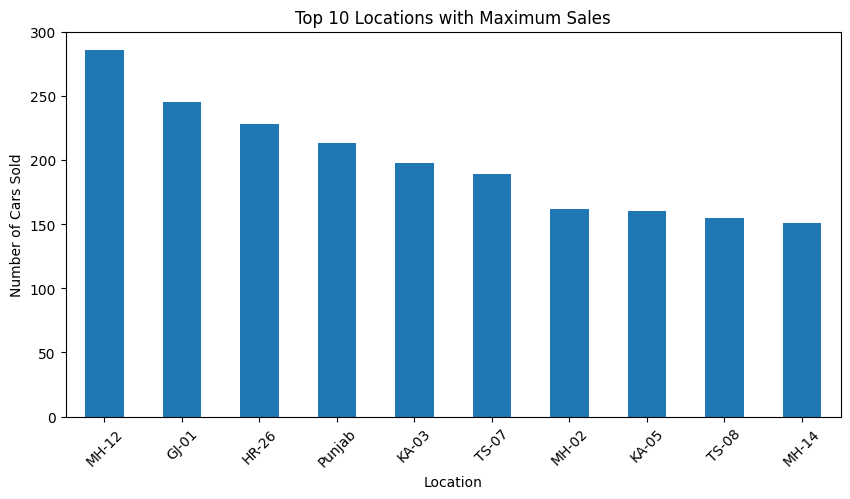

In [54]:
plt.figure(figsize=(10,5))
max_sales_location.plot(kind='bar', title='Top 10 Locations with Maximum Sales')
plt.xlabel('Location')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

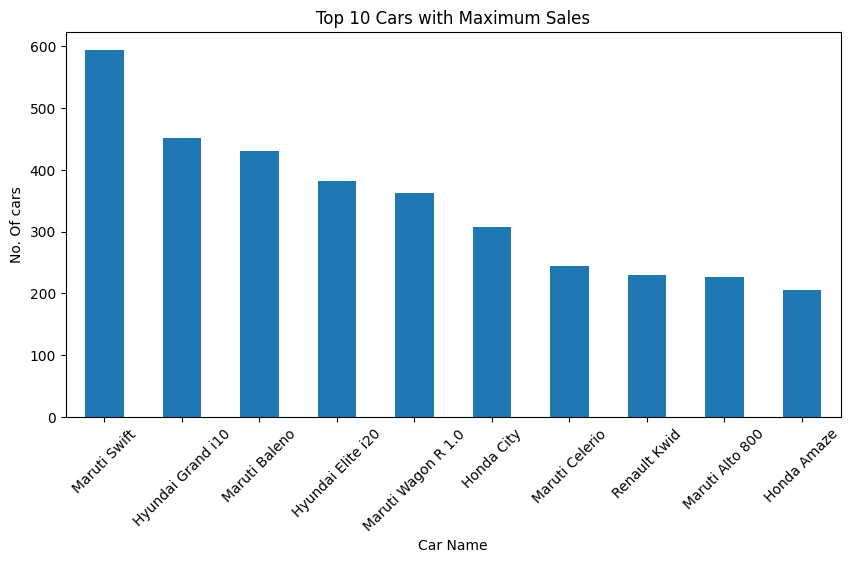

In [60]:
plt.figure(figsize=(10,5))
max_sales_car.plot(kind='bar', title='Top 10 Cars with Maximum Sales')
plt.xlabel('Car Name')
plt.ylabel('No. Of cars')
plt.xticks(rotation=45)
plt.show()

Fuel
PETROL    6413
DIESEL    1066
CNG        535
LPG          1
Name: count, dtype: int64


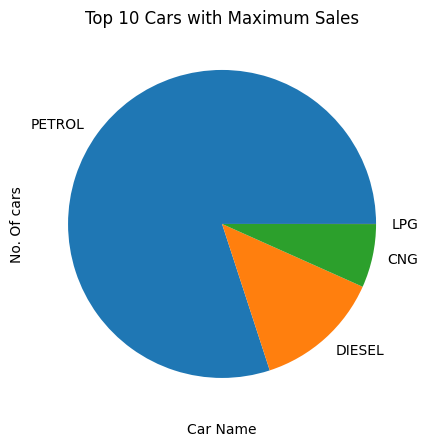

In [70]:
Fuel_type=df["Fuel"].value_counts()
print(Fuel_type)
plt.figure(figsize=(10,5))
Fuel_type.plot(kind='pie', title='Top 10 Cars with Maximum Sales')
plt.xlabel('Car Name')
plt.ylabel('No. Of cars')
plt.xticks(rotation=45)
plt.show()